##  1- Import des modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import graphviz
from sklearn import preprocessing,model_selection
import itertools

## 2- Récuperation des data

In [4]:
train_df = pd.read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-train.csv')
test_df = pd.read_csv('https://oml-data.s3.amazonaws.com/kaggle-give-me-credit-test.csv')

print ("training dataset shape is {}".format(train_df.shape))
print ("testing dataset shape is {}".format(test_df.shape))

training dataset shape is (150000, 12)
testing dataset shape is (101503, 12)


## 3 - Nettoyage des données

In [5]:
col_names = train_df.columns.values
col_names[0] = 'ID' ## on renomme la premiere colonne en 'ID'
train_df.columns = col_names ## assign new column name to training dataset
test_df.columns = col_names ## assign new column name to testing dataset

In [6]:
print ("Take a peek at training dataset")
train_df.head()

Take a peek at training dataset


ID  RevolvingUtilizationOfUnsecuredLines  age  \
0   1                              0.766127   45   
1   2                              0.957151   40   
2   3                              0.658180   38   
3   4                              0.233810   30   
4   5                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                        0   
1                                4                        0   
2                                2                        1   
3                                5                        0   
4                                7                        0   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             6                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             1                                     0   

   NumberOfDependents  SeriousDlqin2yrs  
0                 2.0                 1  
1                 1.0                 0  
2                 0.0                 0  
3                 0.0                 0  
4                 0.0                 0

In [7]:
print ("Take a peek at testing dataset")
test_df.head()

Take a peek at testing dataset


ID  RevolvingUtilizationOfUnsecuredLines       age  \
0   1                                   NaN  0.885519   
1   2                                   NaN  0.463295   
2   3                                   NaN  0.043275   
3   4                                   NaN  0.280308   
4   5                                   NaN  1.000000   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                    43          0       0.177513   
1                                    57          0       0.527237   
2                                    59          0       0.687648   
3                                    38          1       0.925961   
4                                    27          0       0.019917   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                           5700.0                        4   
1                           9141.0                       15   
2                           5083.0                       12   
3                           3200.0                        7   
4                           3865.0                        4   

   NumberRealEstateLoansOrLines  NumberOfTime60-89DaysPastDueNotWorse  \
0                             0                                     0   
1                             0                                     4   
2                             0                                     1   
3                             0                                     2   
4                             0                                     0   

   NumberOfDependents  SeriousDlqin2yrs  
0                   0               0.0  
1                   0               2.0  
2                   0               2.0  
3                   0               0.0  
4                   0               1.0

In [8]:
# on verifie le type de données sur train et test

print(train_df.dtypes)

ID                                        int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
SeriousDlqin2yrs                          int64
dtype: object


In [9]:
print(test_df.dtypes)

ID                                        int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                                 int64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                        int64
SeriousDlqin2yrs                        float64
dtype: object


## Verifier la distribution de chaque feature pour identifier les valeurs aberrantes

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


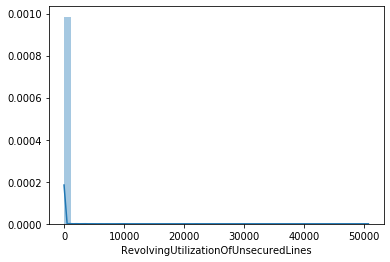

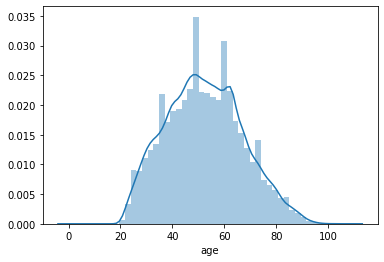

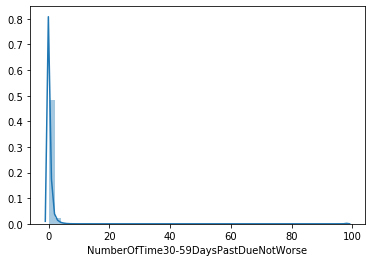

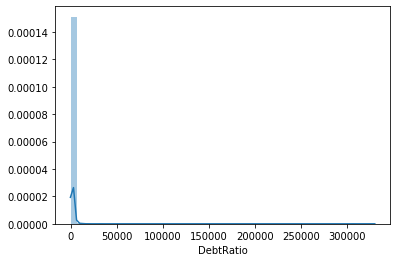

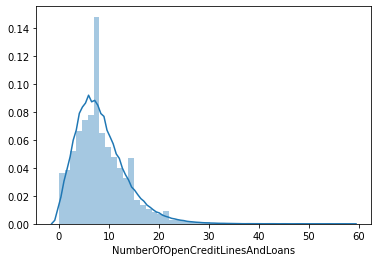

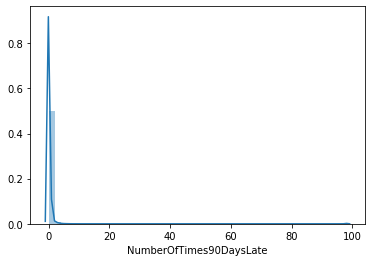

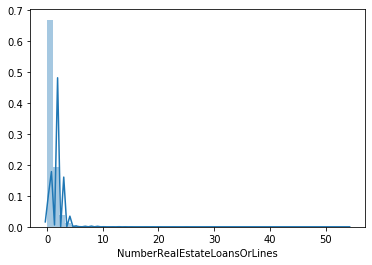

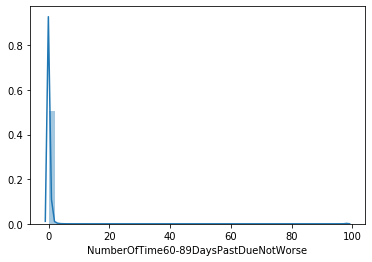

In [10]:
# On supprime la colonne ID, la target SeriousDl et les colonnes avec des donnees manquantes: Monthly income et Number of dependents

feature_list=list(train_df.columns.values) #on liste toutes les valeurs du fichier train

remove_list = ['ID','SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents'] # On sort de cette liste les colonnes à supprimer

for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.distplot(train_df[each])  # avec seaborn on affiche la distribution de chaque feature restant
    plt.show()

In [11]:
print (train_df.columns.values)

['ID' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents' 'SeriousDlqin2yrs']


In [12]:
log_trans_list = train_df.columns.values[[2,4,5,8,9,10]]
log_trans_list
for each in log_trans_list:
    train_df[each] = np.log(1+train_df[each].values)

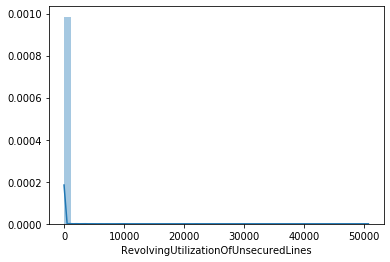

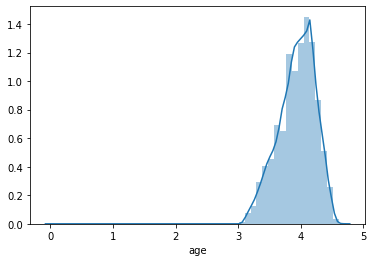

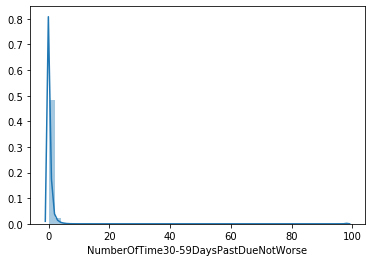

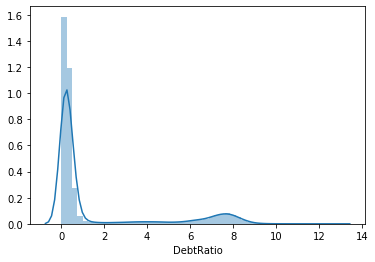

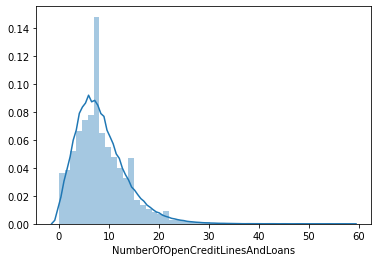

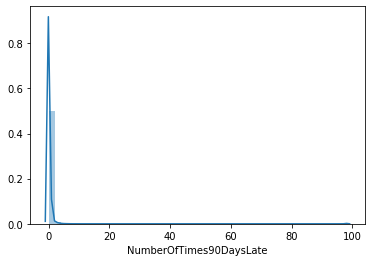

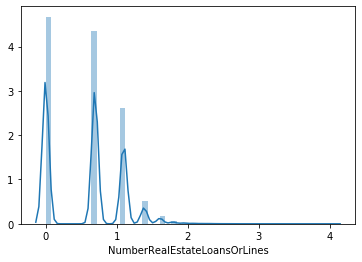

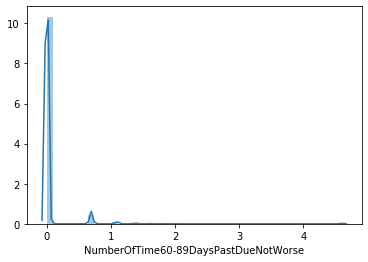

In [13]:
for each in feature_list:
    sns.distplot(train_df[each])
    plt.show()

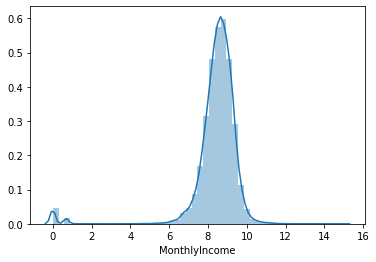

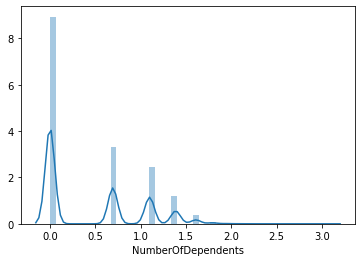

In [14]:
partial_train_df = train_df[['MonthlyIncome','NumberOfDependents']]
#partial_train_df.dropna(how='any')
partial_train_df = partial_train_df.dropna(how='any')

sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

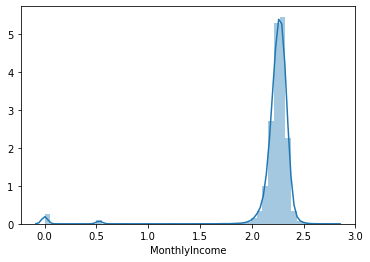

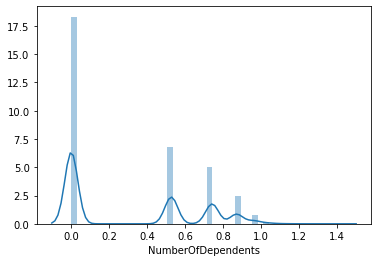

In [15]:
partial_train_df['MonthlyIncome'] = np.log(1+partial_train_df['MonthlyIncome'].values)
partial_train_df['NumberOfDependents'] = np.log(1+partial_train_df['NumberOfDependents'].values)
sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

In [16]:
train_df['MonthlyIncome'] = np.log(1+train_df['MonthlyIncome'].values)
train_df['NumberOfDependents'] = np.log(1+train_df['NumberOfDependents'].values)

In [17]:
print (pd.isnull(train_df).sum(axis=0))

ID                                          0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
SeriousDlqin2yrs                            0
dtype: int64


In [18]:
print (pd.isnull(test_df).sum(axis=0))

ID                                           0
RevolvingUtilizationOfUnsecuredLines    101503
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans          20103
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
SeriousDlqin2yrs                          2626
dtype: int64
